# Student Performance Prediction

In [20]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load data
data = pd.read_csv("data/student_data.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [31]:
data.columns = data.columns.str.lower()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studentid          2392 non-null   object 
 1   age                2392 non-null   int64  
 2   gender             2392 non-null   int64  
 3   ethnicity          2392 non-null   int64  
 4   parentaleducation  2392 non-null   int64  
 5   studytimeweekly    2392 non-null   float64
 6   absences           2392 non-null   int64  
 7   tutoring           2392 non-null   int64  
 8   parentalsupport    2392 non-null   int64  
 9   extracurricular    2392 non-null   int64  
 10  sports             2392 non-null   int64  
 11  music              2392 non-null   int64  
 12  volunteering       2392 non-null   int64  
 13  gpa                2392 non-null   float64
 14  gradeclass         2392 non-null   float64
dtypes: float64(3), int64(11), object(1)
memory usage: 280.4+ KB


In [33]:
data['studentid'] = data['studentid'].astype('object')

In [21]:
data.duplicated().sum()

0

In [23]:
data['studentid'].duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

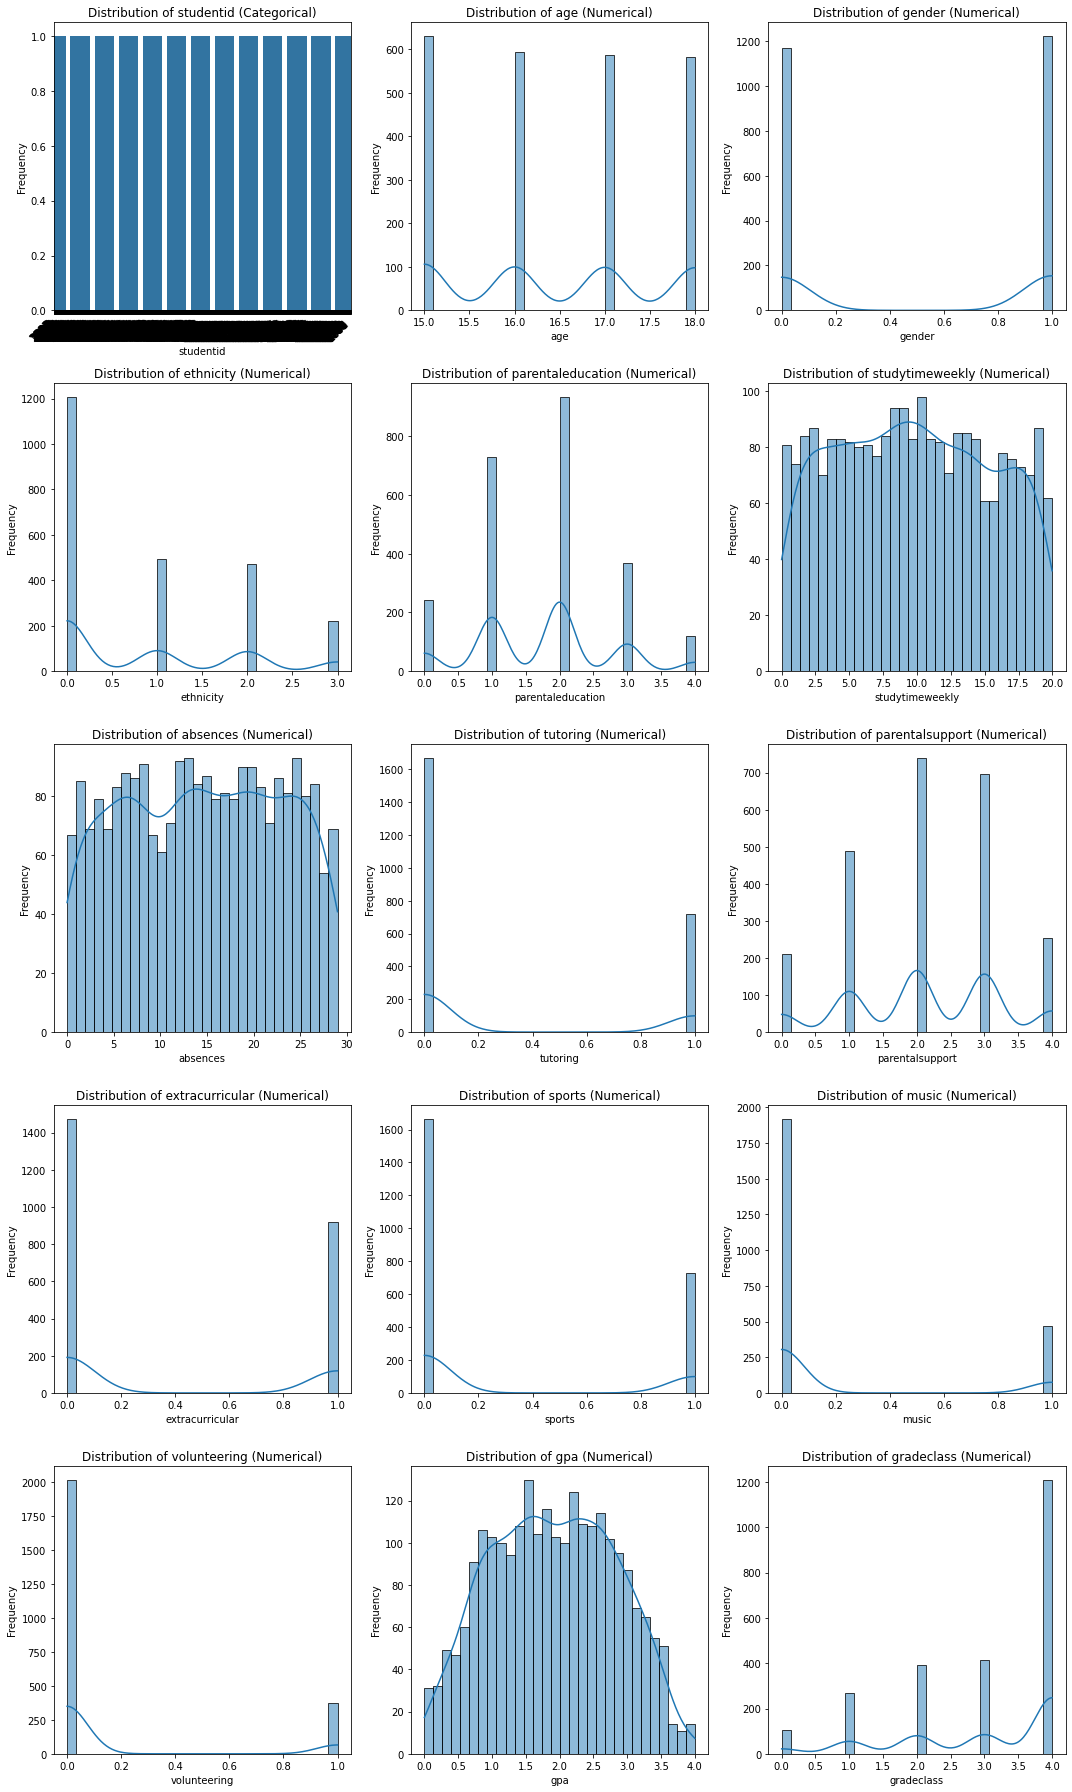

In [24]:
# Set the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
columns = data.columns  # Dataset columns

n_rows = -(-len(columns) // n_cols)  # Calculate rows to fit all plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each column
for i, column in enumerate(columns):
    ax = axes[i]
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.histplot(data[column], kde=True, bins=30, ax=ax)
        ax.set_title(f'Distribution of {column} (Numerical)')
    elif pd.api.types.is_categorical_dtype(data[column]) or data[column].dtype == 'object':
        sns.countplot(x=data[column], order=data[column].value_counts().index, ax=ax)
        ax.set_title(f'Distribution of {column} (Categorical)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete any unused axes

plt.tight_layout()
plt.show()

### Bivariate Analysis
Exploring relationships between features and the target variable

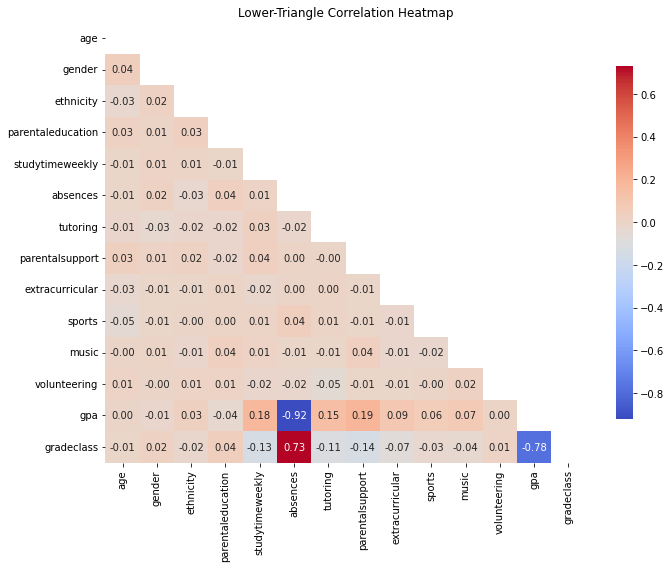

In [28]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, 
            mask=mask,  # Apply the mask
            annot=True,  # Display correlation values
            cmap='coolwarm',  # Choose a color palette
            fmt='.2f',  # Format for the correlation values
            square=False,  # Make the heatmap square-shaped
            cbar_kws={'shrink': 0.8})  # Adjust color bar size
plt.title('Lower-Triangle Correlation Heatmap')
plt.tight_layout()
plt.show()

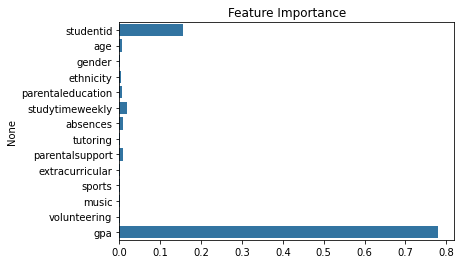

In [35]:
# Feature importance with Random Forest
from sklearn.ensemble import RandomForestRegressor

X = data.drop('gradeclass', axis=1)  # Features
y = data['gradeclass']              # Target
model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importance
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

### Pairwise Plots

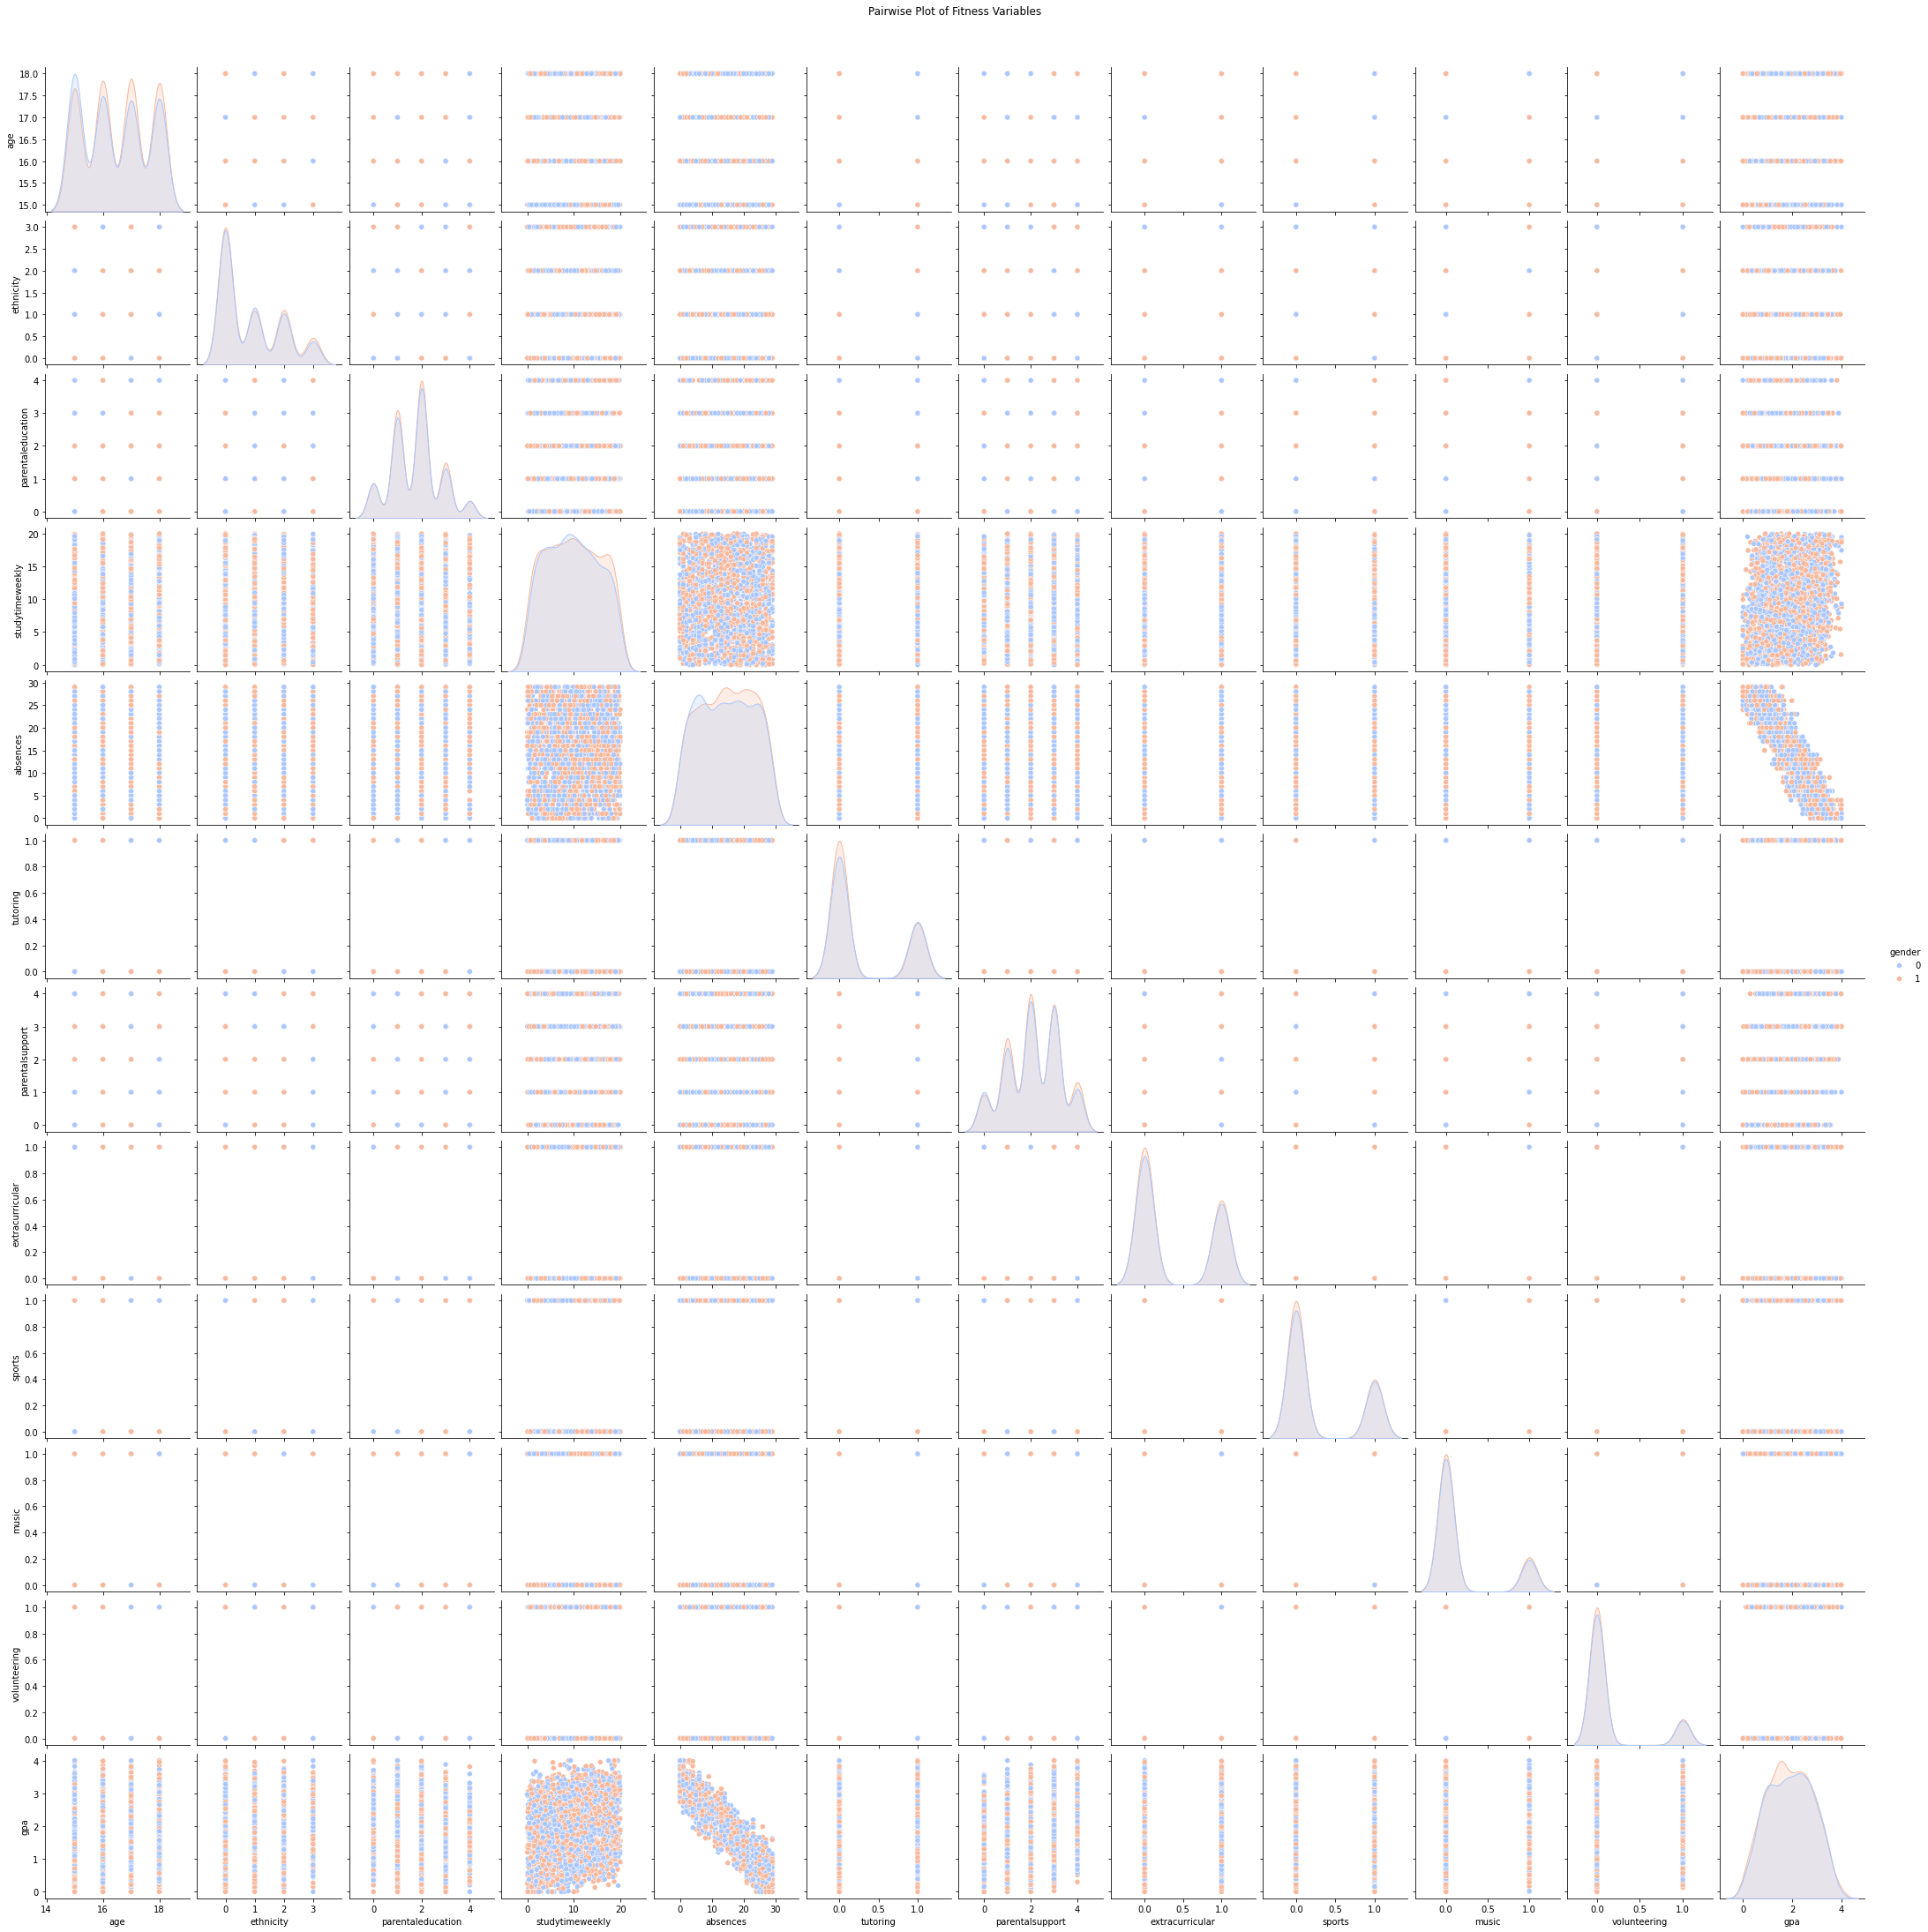

In [37]:
# Select relevant columns
pairplot_columns = ['age', 'gender', 'ethnicity', 'parentaleducation',
       'studytimeweekly', 'absences', 'tutoring', 'parentalsupport',
       'extracurricular', 'sports', 'music', 'volunteering', 'gpa']

# Pairplot with hue (categorical differentiation)
sns.pairplot(data[pairplot_columns], hue='gender', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairwise Plot of Fitness Variables', y=1.02)
plt.show()

In [40]:
# Example: Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=10)
selector.fit(X, y)

# Selected Features
print("Selected features:", X.columns[selector.support_])


Selected features: Index(['age', 'gender', 'ethnicity', 'parentaleducation', 'absences',
       'parentalsupport', 'sports', 'music', 'volunteering', 'gpa'],
      dtype='object')


gradeclass           1.000000
absences             0.728633
parentaleducation    0.041031
gender               0.022998
volunteering         0.013156
age                 -0.006250
ethnicity           -0.023326
sports              -0.026654
music               -0.036065
extracurricular     -0.069733
tutoring            -0.111695
studytimeweekly     -0.134131
parentalsupport     -0.136823
gpa                 -0.782835
Name: gradeclass, dtype: float64


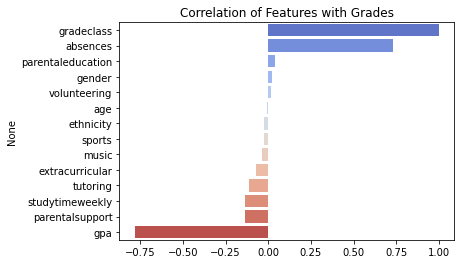

In [42]:
# Compute Pearson correlation
correlations = data.corr()

# Sort by target variable (e.g., 'grades')
target_corr = correlations['gradeclass'].sort_values(ascending=False)

# Display correlations
print(target_corr)

# Visualize the top correlated features
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Grades')
plt.show()